### MODELO DE CLASSIFICAÇÃO: PROJETO INFNET

Nessa disciplina, aprendemos nossos conhecimentos em algoritmos supervisionados, família de algoritmos que é extremamente importante para o dia-a-dia de um cientista de dados. Agora iremos validar nosso conhecimento. 

#### 1. Faça o módulo do Kaggle Intro to Machine Learning:

Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 

Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

https://www.kaggle.com/datasets/rajyellow46/wine-quality

In [1]:
pip install kagglehub 2> NUL

In [2]:
import kagglehub
print(kagglehub.__version__)

0.3.9


In [3]:
import pandas as pd
import os

# Fazendo o download do dataset do kaggle
# O dataset é baixado para um diretório temporário
path = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path)

# Encontrando o arquivo CSV no diretório baixado
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break
    if csv_file:
        break

if csv_file:
    print(f"CSV file found: {csv_file}")
    # Carregando o CSV em um DataFrame
    df = pd.read_csv(csv_file)
    display("Data loaded into DataFrame:")
    display(df.head())  # Exibindo as primeiras linhas do DataFrame
else:
    print("No CSV file found in the downloaded dataset.")

Path to dataset files: C:\Users\cmbar\.cache\kagglehub\datasets\rajyellow46\wine-quality\versions\1
CSV file found: C:\Users\cmbar\.cache\kagglehub\datasets\rajyellow46\wine-quality\versions\1\winequalityN.csv


'Data loaded into DataFrame:'

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 2. Faça o download da base - esta é uma base real, apresentada no artigo:

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [4]:
# Adicionando uma coluna 'opinion' ao DataFrame
df['opinion'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Excluindo a coluna 'quality' do DataFrame
df.drop(columns=['quality'], inplace=True)

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [6]:
# Lista com a tradução das colunas para o português
traducao_colunas = {
    'fixed acidity': 'acidez fixa',
    'volatile acidity': 'acidez volátil',
    'citric acid': 'ácido cítrico',
    'residual sugar': 'açúcar residual',
    'chlorides': 'cloretos',
    'free sulfur dioxide': 'dióxido de enxofre livre',
    'total sulfur dioxide': 'dióxido de enxofre total',
    'density': 'densidade',
    'pH': 'pH',
    'sulphates': 'sulfatos',
    'alcohol': 'álcool',
    'opinion': 'opinião'  # Nova coluna que criamos anteriormente
}

# Renomeando as colunas do DataFrame original
df = df.rename(columns=traducao_colunas)

# Exibindo o DataFrame traduzido
print("DataFrame com colunas traduzidas para o português:")
display(df.head())

DataFrame com colunas traduzidas para o português:


,type,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,opinião
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


#### 3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [7]:
# 1. Identificar as variáveis e seus tipos
print("Variáveis presentes na base de dados:")
print(df.columns.tolist())

# 2. Classificar as variáveis
# Variáveis numéricas (contínuas ou discretas)
variaveis_numericas = df.select_dtypes(include=['float64']).columns.tolist()

# Variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object', 'category' , 'int64']).columns.tolist()

print("\nVariáveis numéricas (contínuas ou discretas):", variaveis_numericas)
print("Variáveis categóricas:", variaveis_categoricas)

# 3. Calcular estatísticas descritivas para variáveis numéricas
print("\nEstatísticas descritivas para variáveis numéricas:")
descricao_numericas = df[variaveis_numericas].describe().transpose()
descricao_numericas = descricao_numericas[['mean', 'std']]  # Selecionando apenas média e desvio padrão
descricao_numericas.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'}, inplace=True)
display(descricao_numericas)

# 4. Descrever variáveis categóricas
print("\nDescrição das variáveis categóricas:")
for var in variaveis_categoricas:
    print(f"\nVariável: {var}")
    print(df[var].value_counts())

Variáveis presentes na base de dados:
['type', 'acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual', 'cloretos', 'dióxido de enxofre livre', 'dióxido de enxofre total', 'densidade', 'pH', 'sulfatos', 'álcool', 'opinião']

Variáveis numéricas (contínuas ou discretas): ['acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual', 'cloretos', 'dióxido de enxofre livre', 'dióxido de enxofre total', 'densidade', 'pH', 'sulfatos', 'álcool']
Variáveis categóricas: ['type', 'opinião']

Estatísticas descritivas para variáveis numéricas:


,Média,Desvio Padrão
acidez fixa,7.216579,1.296750
acidez volátil,0.339691,0.164649
ácido cítrico,0.318722,0.145265
açúcar residual,5.444326,4.758125
cloretos,0.056042,0.035036
dióxido de enxofre livre,30.525319,17.749400
dióxido de enxofre total,115.744574,56.521855
densidade,0.994697,0.002999
pH,3.218395,0.160748
sulfatos,0.531215,0.148814



Descrição das variáveis categóricas:

Variável: type
type
white    4898
red      1599
Name: count, dtype: int64

Variável: opinião
opinião
1    4113
0    2384
Name: count, dtype: int64


#### 4. Com a base escolhida:

##### Descreva as etapas necessárias para criar um modelo de classificação eficiente.

In [8]:
print('''
Etapas para criar um modelo de classificação eficiente:

1. **Entendimento do Problema**:
   - Defina o objetivo do modelo (ex.: prever a variável "opinião").
   - Entenda o contexto do problema e as métricas de sucesso (ex.: acurácia, precisão, recall, F1-score).

2. **Pré-processamento dos Dados**:
   - Trate valores faltantes (ex.: remover, imputar).
   - Codifique variáveis categóricas (ex.: one-hot encoding, label encoding).
   - Normalize ou padronize variáveis numéricas, se necessário.
   - Divida os dados em conjuntos de treino e teste (ex.: 80% treino, 20% teste).

3. **Seleção de Features**:
   - Remova variáveis irrelevantes ou redundantes.
   - Use técnicas como análise de correlação, importância de features ou seleção recursiva.

4. **Escolha do Modelo**:
   - Escolha algoritmos de classificação adequados (ex.: Regressão Logística, Árvores de Decisão, Random Forest, SVM, XGBoost).

5. **Treinamento do Modelo**:
   - Treine o modelo usando o conjunto de treino.
   - Ajuste hiperparâmetros usando validação cruzada (ex.: GridSearchCV, RandomizedSearchCV).

6. **Avaliação do Modelo**:
   - Teste o modelo no conjunto de teste.
   - Use métricas como acurácia, matriz de confusão, precisão, recall, F1-score e AUC-ROC.
   - Verifique se há overfitting ou underfitting.

7. **Otimização**:
   - Melhore o modelo ajustando hiperparâmetros, selecionando novas features ou usando técnicas como ensemble learning.
   - Considere balanceamento de classes, se necessário (ex.: oversampling, undersampling).

8. **Implantação**


9. **Manutenção**

''')


Etapas para criar um modelo de classificação eficiente:

1. **Entendimento do Problema**:
   - Defina o objetivo do modelo (ex.: prever a variável "opinião").
   - Entenda o contexto do problema e as métricas de sucesso (ex.: acurácia, precisão, recall, F1-score).

2. **Pré-processamento dos Dados**:
   - Trate valores faltantes (ex.: remover, imputar).
   - Codifique variáveis categóricas (ex.: one-hot encoding, label encoding).
   - Normalize ou padronize variáveis numéricas, se necessário.
   - Divida os dados em conjuntos de treino e teste (ex.: 80% treino, 20% teste).

3. **Seleção de Features**:
   - Remova variáveis irrelevantes ou redundantes.
   - Use técnicas como análise de correlação, importância de features ou seleção recursiva.

4. **Escolha do Modelo**:
   - Escolha algoritmos de classificação adequados (ex.: Regressão Logística, Árvores de Decisão, Random Forest, SVM, XGBoost).

5. **Treinamento do Modelo**:
   - Treine o modelo usando o conjunto de treino.
   - Ajuste

##### Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar

In [9]:
# Importações necessárias
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.impute import SimpleImputer


In [10]:
# Verificando se há valores faltantes no DataFrame
print(df.isnull().sum())

type                         0
acidez fixa                 10
acidez volátil               8
ácido cítrico                3
açúcar residual              2
cloretos                     2
dióxido de enxofre livre     0
dióxido de enxofre total     0
densidade                    0
pH                           9
sulfatos                     4
álcool                       0
opinião                      0
dtype: int64


In [11]:

# 2. Preencher valores faltantes nas colunas numéricas com a média
imputer_numerico = SimpleImputer(strategy='mean')
df[variaveis_numericas] = imputer_numerico.fit_transform(df[variaveis_numericas])

# 3. Preencher valores faltantes nas colunas categóricas com a moda (valor mais frequente)
if len(variaveis_categoricas) > 0:  # Verifica se há colunas categóricas
    imputer_categorico = SimpleImputer(strategy='most_frequent')
    df[variaveis_categoricas] = imputer_categorico.fit_transform(df[variaveis_categoricas])



In [12]:
# Verificando se há valores faltantes no DataFrame
print(df.isnull().sum())

type                        0
acidez fixa                 0
acidez volátil              0
ácido cítrico               0
açúcar residual             0
cloretos                    0
dióxido de enxofre livre    0
dióxido de enxofre total    0
densidade                   0
pH                          0
sulfatos                    0
álcool                      0
opinião                     0
dtype: int64


In [13]:
# 4. Filtrar os DataFrames por tipo de vinho
# Supondo que a coluna 'type' contenha 'white' e 'red'
df_white = df[df['type'] == 'white']  # Filtra apenas vinhos brancos
df_red = df[df['type'] == 'red']      # Filtra apenas vinhos tin

In [14]:
# Remover a coluna 'type' dos novos DataFrames
df_white = df.drop(columns=['type'])
df_red = df_red.drop(columns=['type'])

In [15]:
df_white.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,opinião
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [16]:
df_red.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,opinião
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:

# Identificar colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar multicolinearidade
encoded_cols = encoder.fit_transform(df[colunas_categoricas])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(colunas_categoricas))

# Remover colunas categóricas originais e adicionar as codificadas
df = df.drop(columns=colunas_categoricas)
df = pd.concat([df, encoded_df], axis=1)

In [18]:
# Verificar e ajustar a coluna 'opinião'
print("Valores únicos na coluna 'opinião':", df_white['opinião'].unique())
print("Tipo de dados da coluna 'opinião':", df_white['opinião'].dtype)
print("Valores faltantes na coluna 'opinião':", df_white['opinião'].isnull().sum())

Valores únicos na coluna 'opinião': [1 0]
Tipo de dados da coluna 'opinião': object
Valores faltantes na coluna 'opinião': 0


In [19]:
# Converter para inteiro e tratar valores faltantes
df_white['opinião'] = df_white['opinião'].astype(int)
df_white = df_white.dropna(subset=['opinião'])  # Remover valores faltantes


In [20]:
# Verificar se a coluna é binária
print("Valores únicos após ajustes:", df_white['opinião'].unique())

Valores únicos após ajustes: [1 0]


In [21]:
# 1. Definindo o modelo e a validação cruzada
modelo = LogisticRegression(max_iter=1000, random_state=42)  # Aumentando o número máximo de iterações para convergência
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [22]:
# 2. Definindo as métricas a serem calculadas
metricas = {
    'acuracia': 'accuracy',
    'precisao': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [23]:
# 3. Aplicando a validação cruzada
resultados = cross_validate(
    modelo,
    df_white.drop(columns=['opinião']),  # Features (X)
    df_white['opinião'],                 # Target (y)
    cv=kfold,
    scoring=metricas
)

c:\Users\cmbar\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cmbar\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [24]:
# i. a média e desvio da acurácia dos modelos obtidos;

media_acuracia = np.mean(resultados['test_acuracia'])
desvio_acuracia = np.std(resultados['test_acuracia'])
print(f"Média da Acurácia: {media_acuracia:.4f}")
print(f"Desvio Padrão da Acurácia: {desvio_acuracia:.4f}")

Média da Acurácia: 0.7403
Desvio Padrão da Acurácia: 0.0166


In [25]:
# ii. a média e desvio da precisão dos modelos obtidos;

media_precisao = np.mean(resultados['test_precisao'])
desvio_precisao = np.std(resultados['test_precisao'])
print(f"\nMédia da Precisão: {media_precisao:.4f}")
print(f"Desvio Padrão da Precisão: {desvio_precisao:.4f}")


Média da Precisão: 0.7705
Desvio Padrão da Precisão: 0.0160


In [26]:
# iii. a média e desvio da recall dos modelos obtidos;

media_recall = np.mean(resultados['test_recall'])
desvio_recall = np.std(resultados['test_recall'])
print(f"\nMédia do Recall: {media_recall:.4f}")
print(f"Desvio Padrão do Recall: {desvio_recall:.4f}")


Média do Recall: 0.8405
Desvio Padrão do Recall: 0.0153


In [27]:
# iv. a média e desvio do f1-score dos modelos obtidos.

media_f1 = np.mean(resultados['test_f1'])
desvio_f1 = np.std(resultados['test_f1'])
print(f"\nMédia do F1-Score: {media_f1:.4f}")
print(f"Desvio Padrão do F1-Score: {desvio_f1:.4f}")


Média do F1-Score: 0.8039
Desvio Padrão do F1-Score: 0.0119


##### Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [28]:
# Importações necessárias
from sklearn.tree import DecisionTreeClassifier

In [29]:
# 1. Definindo o modelo e a validação cruzada
modelo = DecisionTreeClassifier(random_state=42)  # Árvore de Decisão
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 2. Definindo as métricas a serem calculadas
metricas = {
    'acuracia': 'accuracy',
    'precisao': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 3. Aplicando a validação cruzada
resultados = cross_validate(
    modelo,
    df_white.drop(columns=['opinião']),  # Features (X)
    df_white['opinião'],                 # Target (y)
    cv=kfold,
    scoring=metricas
)

In [30]:
# i. a média e desvio da acurácia dos modelos obtidos;

media_acuracia = np.mean(resultados['test_acuracia'])
desvio_acuracia = np.std(resultados['test_acuracia'])
print(f"Média da Acurácia: {media_acuracia:.4f}")
print(f"Desvio Padrão da Acurácia: {desvio_acuracia:.4f}")

Média da Acurácia: 0.7897
Desvio Padrão da Acurácia: 0.0156


In [31]:
# ii. a média e desvio da precisão dos modelos obtidos;

media_precisao = np.mean(resultados['test_precisao'])
desvio_precisao = np.std(resultados['test_precisao'])
print(f"\nMédia da Precisão: {media_precisao:.4f}")
print(f"Desvio Padrão da Precisão: {desvio_precisao:.4f}")


Média da Precisão: 0.8308
Desvio Padrão da Precisão: 0.0135


In [32]:
# iii. a média e desvio da recall dos modelos obtidos;

media_recall = np.mean(resultados['test_recall'])
desvio_recall = np.std(resultados['test_recall'])
print(f"\nMédia do Recall: {media_recall:.4f}")
print(f"Desvio Padrão do Recall: {desvio_recall:.4f}")


Média do Recall: 0.8388
Desvio Padrão do Recall: 0.0152


In [33]:
# iv. a média e desvio do f1-score dos modelos obtidos.

media_f1 = np.mean(resultados['test_f1'])
desvio_f1 = np.std(resultados['test_f1'])
print(f"\nMédia do F1-Score: {media_f1:.4f}")
print(f"Desvio Padrão do F1-Score: {desvio_f1:.4f}")


Média do F1-Score: 0.8347
Desvio Padrão do F1-Score: 0.0124


##### Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [34]:
from sklearn.svm import SVC

In [35]:
modelo = SVC(random_state=42)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metricas = {
    'acuracia': 'accuracy',
    'precisao': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
resultados = cross_validate(
    modelo,
    df_white.drop(columns=['opinião']),
    df_white['opinião'],
    cv=kfold,
    scoring=metricas
)

In [36]:
# i. a média e desvio da acurácia dos modelos obtidos;

media_acuracia = np.mean(resultados['test_acuracia'])
desvio_acuracia = np.std(resultados['test_acuracia'])
print(f"Média da Acurácia: {media_acuracia:.4f}")
print(f"Desvio Padrão da Acurácia: {desvio_acuracia:.4f}")

Média da Acurácia: 0.6338
Desvio Padrão da Acurácia: 0.0021


In [37]:
# ii. a média e desvio da precisão dos modelos obtidos;

media_precisao = np.mean(resultados['test_precisao'])
desvio_precisao = np.std(resultados['test_precisao'])
print(f"Média da Precisão: {media_precisao:.4f}")
print(f"Desvio Padrão da Precisão: {desvio_precisao:.4f}")

Média da Precisão: 0.6340
Desvio Padrão da Precisão: 0.0014


In [38]:
# iii. a média e desvio da recall dos modelos obtidos;

media_recall = np.mean(resultados['test_recall'])
desvio_recall = np.std(resultados['test_recall'])
print(f"Média do Recall: {media_recall:.4f}")
print(f"Desvio Padrão do Recall: {desvio_recall:.4f}")

Média do Recall: 0.9976
Desvio Padrão do Recall: 0.0065


In [39]:
# iv. a média e desvio do f1-score dos modelos obtidos.

media_f1 = np.mean(resultados['test_f1'])
desvio_f1 = np.std(resultados['test_f1'])
print(f"Média do F1-Score: {media_f1:.4f}")
print(f"Desvio Padrão do F1-Score: {desvio_f1:.4f}")

Média do F1-Score: 0.7752
Desvio Padrão do F1-Score: 0.0019


#### 5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

In [40]:
# Importações necessárias
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint  # Para distribuições contínuas e discretas

In [41]:
# Seed para reprodutibilidade
SEED = 42
np.random.seed(SEED)

In [42]:
# 1. Definindo os modelos e seus hiperparâmetros para GridSearch
modelos = {
    'Regressão Logística': {
        'modelo': LogisticRegression(max_iter=10000, random_state=SEED),
        'parametros': {
            'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
            'solver': ['liblinear', 'lbfgs', 'sag']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(random_state=SEED),
        'parametros': {
            'max_depth': [None, 5, 10, 20],  # Profundidade máxima da árvore
            'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
            'min_samples_leaf': [1, 2, 4]     # Número mínimo de amostras em uma folha
        }
    },
    'SVM': {
        'modelo': SVC(probability=True, random_state=SEED),  # probability=True para calcular probabilidades
        'parametros': {
            'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
            'kernel': ['linear', 'rbf'],    # Tipo de kernel
            'gamma': ['scale', 'auto']      # Coeficiente do kernel
        }
    }
}

In [43]:
# 2. Definindo a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

In [44]:
# 3. Preparando para armazenar as curvas ROC
tprs = {}  # Taxa de verdadeiros positivos (True Positive Rate)
aucs = {}  # Área sob a curva ROC (AUC)
mean_fpr = np.linspace(0, 1, 100)  # Eixo x da curva ROC (False Positive Rate)

In [45]:
# Inicializando os dicionários
for nome_modelo in modelos.keys():
    tprs[nome_modelo] = []
    aucs[nome_modelo] = []

In [46]:
# 4. Otimizando hiperparâmetros e calculando as curvas ROC para cada modelo
for nome_modelo, config in modelos.items():
    modelo = config['modelo']
    parametros = config['parametros']

    # Usando RandomizedSearchCV para encontrar os melhores hiperparâmetros
    random_search = RandomizedSearchCV(
        modelo,
        parametros,
        n_iter=10,  # Número de combinações de hiperparâmetros a serem testadas
        cv=kfold,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(df_white.drop(columns=['opinião']), df_white['opinião'])

    # Melhor modelo após RandomizedSearch
    melhor_modelo = random_search.best_estimator_

    # Calculando as curvas ROC com o melhor modelo
    for train_idx, test_idx in kfold.split(df_white.drop(columns=['opinião']), df_white['opinião']):
        X_train, X_test = df_white.drop(columns=['opinião']).iloc[train_idx], df_white.drop(columns=['opinião']).iloc[test_idx]
        y_train, y_test = df_white['opinião'].iloc[train_idx], df_white['opinião'].iloc[test_idx]

        # Treinando o melhor modelo
        melhor_modelo.fit(X_train, y_train)

        # Calculando as probabilidades para a classe positiva
        if hasattr(melhor_modelo, "predict_proba"):
            probas = melhor_modelo.predict_proba(X_test)[:, 1]
        else:
            probas = melhor_modelo.decision_function(X_test)
            probas = (probas - probas.min()) / (probas.max() - probas.min())  # Normalizando para [0, 1]

        # Calculando a curva ROC
        fpr, tpr, _ = roc_curve(y_test, probas)
        tprs[nome_modelo].append(np.interp(mean_fpr, fpr, tpr))  # Interpolando para o eixo x comum
        tprs[nome_modelo][-1][0] = 0.0  # Garantindo que a curva começa em (0, 0)
        roc_auc = auc(fpr, tpr)
        aucs[nome_modelo].append(roc_auc)

In [49]:
# 5. Calculando a AUC média para cada modelo
auc_medias = {nome_modelo: np.mean(aucs[nome_modelo]) for nome_modelo in modelos.keys()}

In [50]:
# 6. Identificando o melhor modelo
melhor_modelo = max(auc_medias, key=auc_medias.get)
melhor_auc = auc_medias[melhor_modelo]

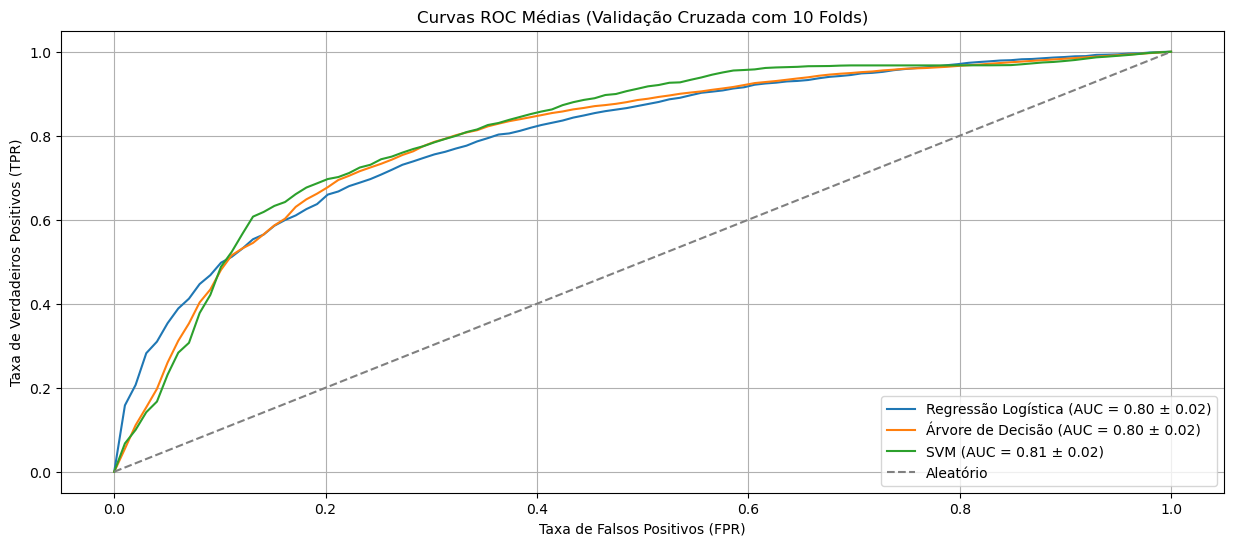

In [81]:
# 7. Plotando as curvas ROC médias
plt.figure(figsize=(15, 6))
for nome_modelo in modelos.keys():
    mean_tpr = np.mean(tprs[nome_modelo], axis=0)
    mean_tpr[-1] = 1.0  # Garantindo que a curva termina em (1, 1)
    mean_auc = auc_medias[nome_modelo]
    std_auc = np.std(aucs[nome_modelo])

    plt.plot(mean_fpr, mean_tpr, label=f'{nome_modelo} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

# Configurações do gráfico
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC Médias (Validação Cruzada com 10 Folds)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:

# 8. Exibindo o melhor modelo
print(f"\nMelhor modelo: {melhor_modelo} com AUC média = {melhor_auc:.2f}")


Melhor modelo: SVM com AUC média = 0.81


#### 6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
# Verificar e ajustar a coluna 'opinião'
print("Valores únicos na coluna 'opinião':", df_red['opinião'].unique())
print("Tipo de dados da coluna 'opinião':", df_red['opinião'].dtype)
print("Valores faltantes na coluna 'opinião':", df_red['opinião'].isnull().sum())


Valores únicos na coluna 'opinião': [0 1]
Tipo de dados da coluna 'opinião': int32
Valores faltantes na coluna 'opinião': 0


In [62]:
# Converter para inteiro e tratar valores faltantes
df_red['opinião'] = df_red['opinião'].astype(int)
df_red = df_red.dropna(subset=['opinião'])  # Remover valores 


In [63]:
# Verificar se a coluna é binária
print("Valores únicos após ajustes:", df_red['opinião'].unique())

Valores únicos após ajustes: [0 1]


In [67]:
# 1. Acessar o melhor modelo treinado
melhor_modelo = random_search.best_estimator_

In [69]:
# 2. Preparar os dados de vinho tinto
X_red = df_red.drop(columns=['opinião'])  # Features
y_red = df_red['opinião']                # Target real

In [70]:
# 3. Fazer a inferência (previsões)
y_pred_red = melhor_modelo.predict(X_red)


In [ ]:
# 4. Calcular métricas de avaliação
acuracia = accuracy_score(y_red, y_pred_red)
precisao = precision_score(y_red, y_pred_red)
recall = recall_score(y_red, y_pred_red)
f1 = f1_score(y_red, y_pred_red)

In [ ]:
# 5. Exibir as métricas
print("Métricas do modelo SVM nos dados de vinho tinto:")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Métricas do modelo SVM nos dados de vinho tinto:
Acurácia: 0.9218
Precisão: 0.9304
Recall: 0.9228
F1-Score: 0.9266


In [75]:
# 6. Justificar o desempenho
if acuracia > 0.75:  # Defina um limite de desempenho aceitável
    print("\nO modelo funciona bem para os vinhos tintos, com desempenho próximo ao observado nos vinhos brancos.")
else:
    print("\nO modelo não funciona tão bem para os vinhos tintos. Isso pode ocorrer porque:")
    print("- As características dos vinhos tintos são diferentes das dos vinhos brancos.")
    print("- O modelo foi treinado apenas com dados de vinhos brancos e pode não generalizar bem para vinhos tintos.")
    print("- Pode ser necessário treinar um modelo separado para vinhos tintos ou usar técnicas de transfer learning.")


O modelo funciona bem para os vinhos tintos, com desempenho próximo ao observado nos vinhos brancos.


#### 7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.

In [1]:
print('link do projeto no kaggle: https://github.com/CBarrosoBRRJ/ML-CLASSIFICACAO_INFNET')

link do projeto no kaggle: https://github.com/CBarrosoBRRJ/ML-CLASSIFICACAO_INFNET


In [2]:
print('Fim do Projeto')

Fim do Projeto
